In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### DATA PREPARATION

took block2C datasets for individual years and combined them.

In [2]:
# datasets of year 2021,2022,2021 respectively
block2C_2021_flattened = pd.read_csv('/content/block2C_2021_flattened.csv')
block2C_2022_flattened = pd.read_csv('/content/block2C_2022_flattened.csv')
block2C_2023_flattened = pd.read_csv('/content/block2C_2023_flattened.csv')

In [3]:
# checking basic info for each for consistency
block2C_2021_flattened.columns

Index(['Unnamed: 0', 'Year', 'Quarter', 'LGA', 'Sex', 'Age_Gr', 'TB_Cases'], dtype='object')

In [4]:
block2C_2021_flattened.shape

(1472, 7)

In [5]:
block2C_2021_flattened.head()

,Unnamed: 0,Year,Quarter,LGA,Sex,Age_Gr,TB_Cases
0,0,2021,1,BIRIN GWARI,Male,0-4,0
1,1,2021,1,BIRIN GWARI,Female,0-4,0
2,2,2021,2,BIRIN GWARI,Male,0-4,0
3,3,2021,2,BIRIN GWARI,Female,0-4,0
4,4,2021,3,BIRIN GWARI,Male,0-4,0


In [6]:
block2C_2022_flattened.columns

Index(['Unnamed: 0', 'Year', 'Quarter', 'LGA', 'Sex', 'Age_Gr', 'TB_Cases'], dtype='object')

In [7]:
block2C_2022_flattened.head()

,Unnamed: 0,Year,Quarter,LGA,Sex,Age_Gr,TB_Cases
0,0,2022,1,Birni – Gwari,Male,0-4,0
1,1,2022,1,Birni – Gwari,Female,0-4,0
2,2,2022,2,Birni – Gwari,Male,0-4,0
3,3,2022,2,Birni – Gwari,Female,0-4,0
4,4,2022,3,Birni – Gwari,Male,0-4,0


In [8]:
block2C_2022_flattened.shape

(1472, 7)

In [9]:
block2C_2023_flattened.columns

Index(['Unnamed: 0', 'Year', 'Quarter', 'LGA', 'Sex', 'Age_Gr', 'TB_Cases'], dtype='object')

In [10]:
block2C_2023_flattened.shape

(1472, 7)

In [11]:
block2C_2023_flattened.head()

,Unnamed: 0,Year,Quarter,LGA,Sex,Age_Gr,TB_Cases
0,0,2023,1,Birni – Gwari,Male,0-4,0
1,1,2023,1,Birni – Gwari,Female,0-4,0
2,2,2023,2,Birni – Gwari,Male,0-4,1
3,3,2023,2,Birni – Gwari,Female,0-4,0
4,4,2023,3,Birni – Gwari,Male,0-4,0


The data of LGA and Age_Gr for 2021 was slightly different formatted than for 2022 and 2023. corrected it to maintain consistency.

In [12]:
# data present in 2021 dataset to be replaced
lgas = list(pd.unique(block2C_2021_flattened['LGA']))
# data presetnt in 2022 dataset to replace with
original_lgas = list(pd.unique(block2C_2022_flattened['LGA']))

print(lgas,'--- ',original_lgas)

['BIRIN GWARI', 'CHIKUN', 'GIWA', 'IGABI', 'IKARA', 'JABA', 'JEMAA', 'KACHIA', 'KADUNA NORTH', 'KADUNA SOUTH', 'KAGARKO', 'KAJURU', 'KAURA', 'KAURU', 'KUBAU', 'KUDAN', 'LERE', 'MARKARFI', 'SABON GARI', 'SANGA', 'SOBA', 'ZANGON KATAF', 'ZARIA'] ---  ['Birni – Gwari', 'Chikun', 'Giwa', 'Igabi', 'Ikara', 'Jaba', "Jema'a", 'Kachia', 'Kaduna North', 'Kaduna South', 'Kagarko', 'Kajuru', 'Kaura', 'Kauru', 'Kubau', 'Kudan', 'Lere', 'Makarfi', 'Sabon – Gari', 'Sanga', 'Soba', 'Zangon – Kataf', 'Zaria']


In [13]:
block2C_2021_flattened['LGA'] = block2C_2021_flattened['LGA'].map(lambda x: original_lgas[lgas.index(x)])

In [14]:
# checking result
pd.unique(block2C_2022_flattened['LGA'])

array(['Birni – Gwari', 'Chikun', 'Giwa', 'Igabi', 'Ikara', 'Jaba',
       "Jema'a", 'Kachia', 'Kaduna North', 'Kaduna South', 'Kagarko',
       'Kajuru', 'Kaura', 'Kauru', 'Kubau', 'Kudan', 'Lere', 'Makarfi',
       'Sabon – Gari', 'Sanga', 'Soba', 'Zangon – Kataf', 'Zaria'],
      dtype=object)

In [15]:
# creating consistency for column Age_Gr
AgeGr_2021 = list(pd.unique(block2C_2021_flattened['Age_Gr']))
AgeGr_2022 = list(pd.unique(block2C_2022_flattened['Age_Gr']))
AgeGr_2023 = list(pd.unique(block2C_2023_flattened['Age_Gr']))

In [16]:
block2C_2021_flattened['Age_Gr'] = block2C_2021_flattened['Age_Gr'].map(lambda x: AgeGr_2022[AgeGr_2021.index(x)])
block2C_2023_flattened['Age_Gr'] = block2C_2023_flattened['Age_Gr'].map(lambda x: AgeGr_2022[AgeGr_2023.index(x)])

In [17]:
# combined dataset for years 2021 to 2023
block2C = pd.concat([block2C_2021_flattened,block2C_2022_flattened,block2C_2023_flattened])
block2C.drop(columns=['Unnamed: 0'],inplace=True)

## Data EDA

In [18]:
block2C.columns

Index(['Year', 'Quarter', 'LGA', 'Sex', 'Age_Gr', 'TB_Cases'], dtype='object')

In [19]:
block2C.shape

(4416, 6)

In [20]:
# checking for null values
block2C.isnull().sum()

Year        0
Quarter     0
LGA         0
Sex         0
Age_Gr      0
TB_Cases    0
dtype: int64

In [21]:
block2C.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4416 entries, 0 to 1471
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      4416 non-null   int64 
 1   Quarter   4416 non-null   int64 
 2   LGA       4416 non-null   object
 3   Sex       4416 non-null   object
 4   Age_Gr    4416 non-null   object
 5   TB_Cases  4416 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 241.5+ KB


In [22]:
block2C.describe()

,Year,Quarter,TB_Cases
count,4416.000000,4416.000000,4416.000000
mean,2022.000000,2.500000,10.446105
std,0.816589,1.118161,19.520661
min,2021.000000,1.000000,0.000000
25%,2021.000000,1.750000,0.000000
50%,2022.000000,2.500000,3.000000
75%,2023.000000,3.250000,11.000000
max,2023.000000,4.000000,215.000000


### Outliers

In [23]:
def find_upper_boundary(data,col):
  Q1 = data[col].quantile(.25)
  Q3 = data[col].quantile(.75)

  IQR = Q3-Q1

  return Q3+1.5*IQR

In [24]:
def locate_outliers(data,col):
  df = data.loc[data[col] > find_upper_boundary(data,col)]
  return df

In [25]:
locate_outliers(block2C,'TB_Cases')

,Year,Quarter,LGA,Sex,Age_Gr,TB_Cases
382,2021,4,Chikun,Male,15-24,32
383,2021,4,Chikun,Female,15-24,33
390,2021,4,Giwa,Male,15-24,73
391,2021,4,Giwa,Female,15-24,96
398,2021,4,Igabi,Male,15-24,34
...,...,...,...,...,...,...
1281,2023,1,Zaria,Female,55-64,38
1344,2023,1,Kachia,Male,>=65,44
1345,2023,1,Kachia,Female,>=65,42
1346,2023,2,Kachia,Male,>=65,42


<Axes: xlabel='TB_Cases'>

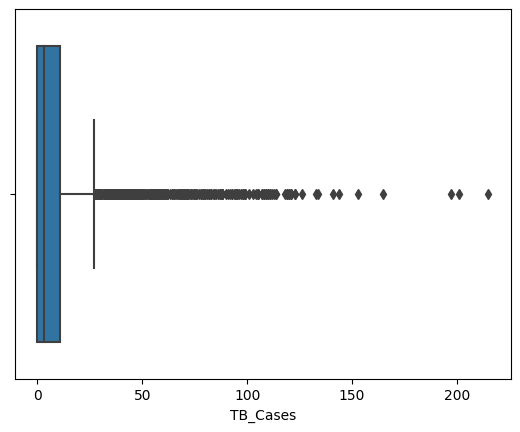

In [26]:
sns.boxplot(data = block2C,
            x = 'TB_Cases')

## UNIVARIATE ANALYSIS

### Year

In [27]:
block2C['Year'].value_counts()

2021    1472
2022    1472
2023    1472
Name: Year, dtype: int64

### Quarter

In [28]:
block2C['Quarter'].value_counts()

1    1104
2    1104
3    1104
4    1104
Name: Quarter, dtype: int64

### LGA

In [29]:
block2C['LGA'].value_counts()

Birni – Gwari     192
Kaura             192
Zangon – Kataf    192
Soba              192
Sanga             192
Sabon – Gari      192
Makarfi           192
Lere              192
Kudan             192
Kubau             192
Kauru             192
Kajuru            192
Chikun            192
Kagarko           192
Kaduna South      192
Kaduna North      192
Kachia            192
Jema'a            192
Jaba              192
Ikara             192
Igabi             192
Giwa              192
Zaria             192
Name: LGA, dtype: int64

### Sex

In [30]:
block2C['Sex'].value_counts()

Male      2208
Female    2208
Name: Sex, dtype: int64

### Age_Gr

In [31]:
block2C['Age_Gr'].value_counts()

0-4      552
5-14     552
15-24    552
25-34    552
35-44    552
45-54    552
55-64    552
>=65     552
Name: Age_Gr, dtype: int64

### TB_Cases

Text(0.5, 1.0, 'TB_Cases Distribution')

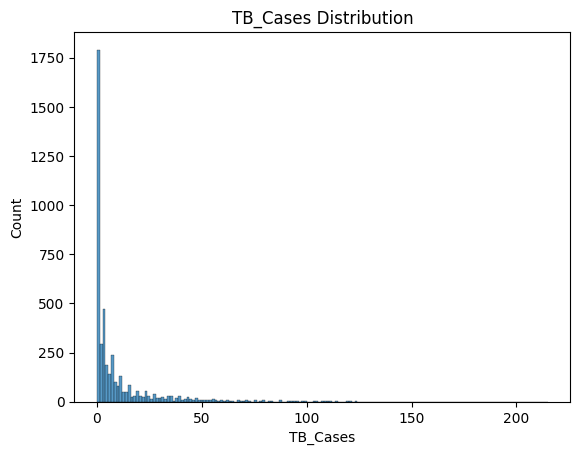

In [64]:
sns.histplot(block2C['TB_Cases'])
plt.xticks(minor=True)
plt.title('TB_Cases Distribution')

## BIVARIATE ANALYSIS

In [33]:
def data_group(data,group_by,aggregate_by,func):
  return data.groupby([group_by])[aggregate_by].aggregate(func)

### TB_Cases By Year

In [34]:
TB_Cases_By_Year = data_group(block2C,'Year','TB_Cases','sum')

In [35]:
TB_Cases_By_Year

Year
2021    10781
2022    21473
2023    13876
Name: TB_Cases, dtype: int64

Text(0.5, 1.0, 'TB_Cases By Year')

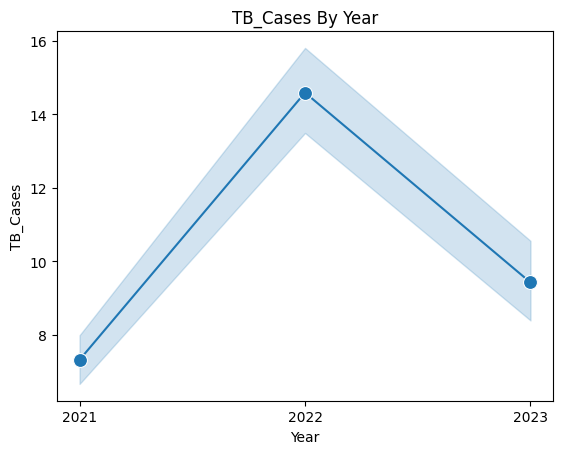

In [65]:
sns.lineplot(
    data = block2C,
    x = 'Year',
    y = 'TB_Cases',
    marker = 'o',
    markersize = 10
)

plt.xticks([2021.0,2022.0,2023.0],[2021,2022,2023])
plt.title('TB_Cases By Year')

### TB_Cases By Quarter

In [37]:
TB_Cases_By_Quarter = data_group(block2C,'Quarter','TB_Cases','sum')

In [38]:
TB_Cases_By_Quarter

Quarter
1    12907
2    14088
3     8440
4    10695
Name: TB_Cases, dtype: int64

Text(0.5, 1.0, 'TB_Cases By Quarter')

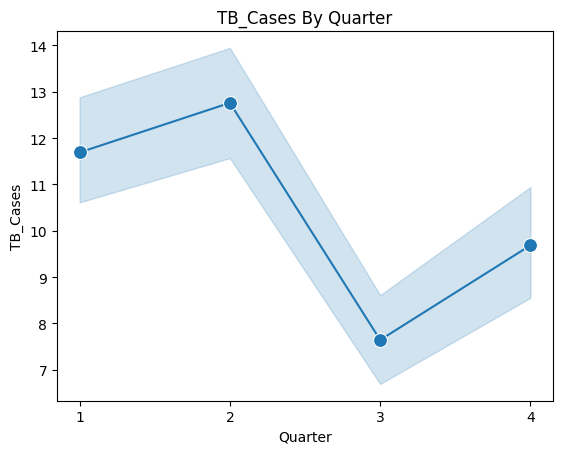

In [66]:
sns.lineplot(
    data = block2C,
    x = 'Quarter',
    y = 'TB_Cases',
    marker = 'o',
    markersize = 10
)

plt.xticks([1.0,2.0,3.0,4.0],[1,2,3,4])
plt.title('TB_Cases By Quarter')

### TB_Cases By LGA

In [40]:
TB_Cases_By_LGA = data_group(block2C,'LGA','TB_Cases','sum')

In [41]:
TB_Cases_By_LGA

LGA
Birni – Gwari     1001
Chikun            2925
Giwa              4111
Igabi             1798
Ikara              485
Jaba               458
Jema'a            1933
Kachia            3632
Kaduna North      6502
Kaduna South      3737
Kagarko            925
Kajuru            1835
Kaura              488
Kauru             3881
Kubau              768
Kudan              438
Lere               520
Makarfi           1021
Sabon – Gari      2039
Sanga              363
Soba               668
Zangon – Kataf    1097
Zaria             5505
Name: TB_Cases, dtype: int64

Text(0.5, 1.0, 'TB_Cases By LGA')

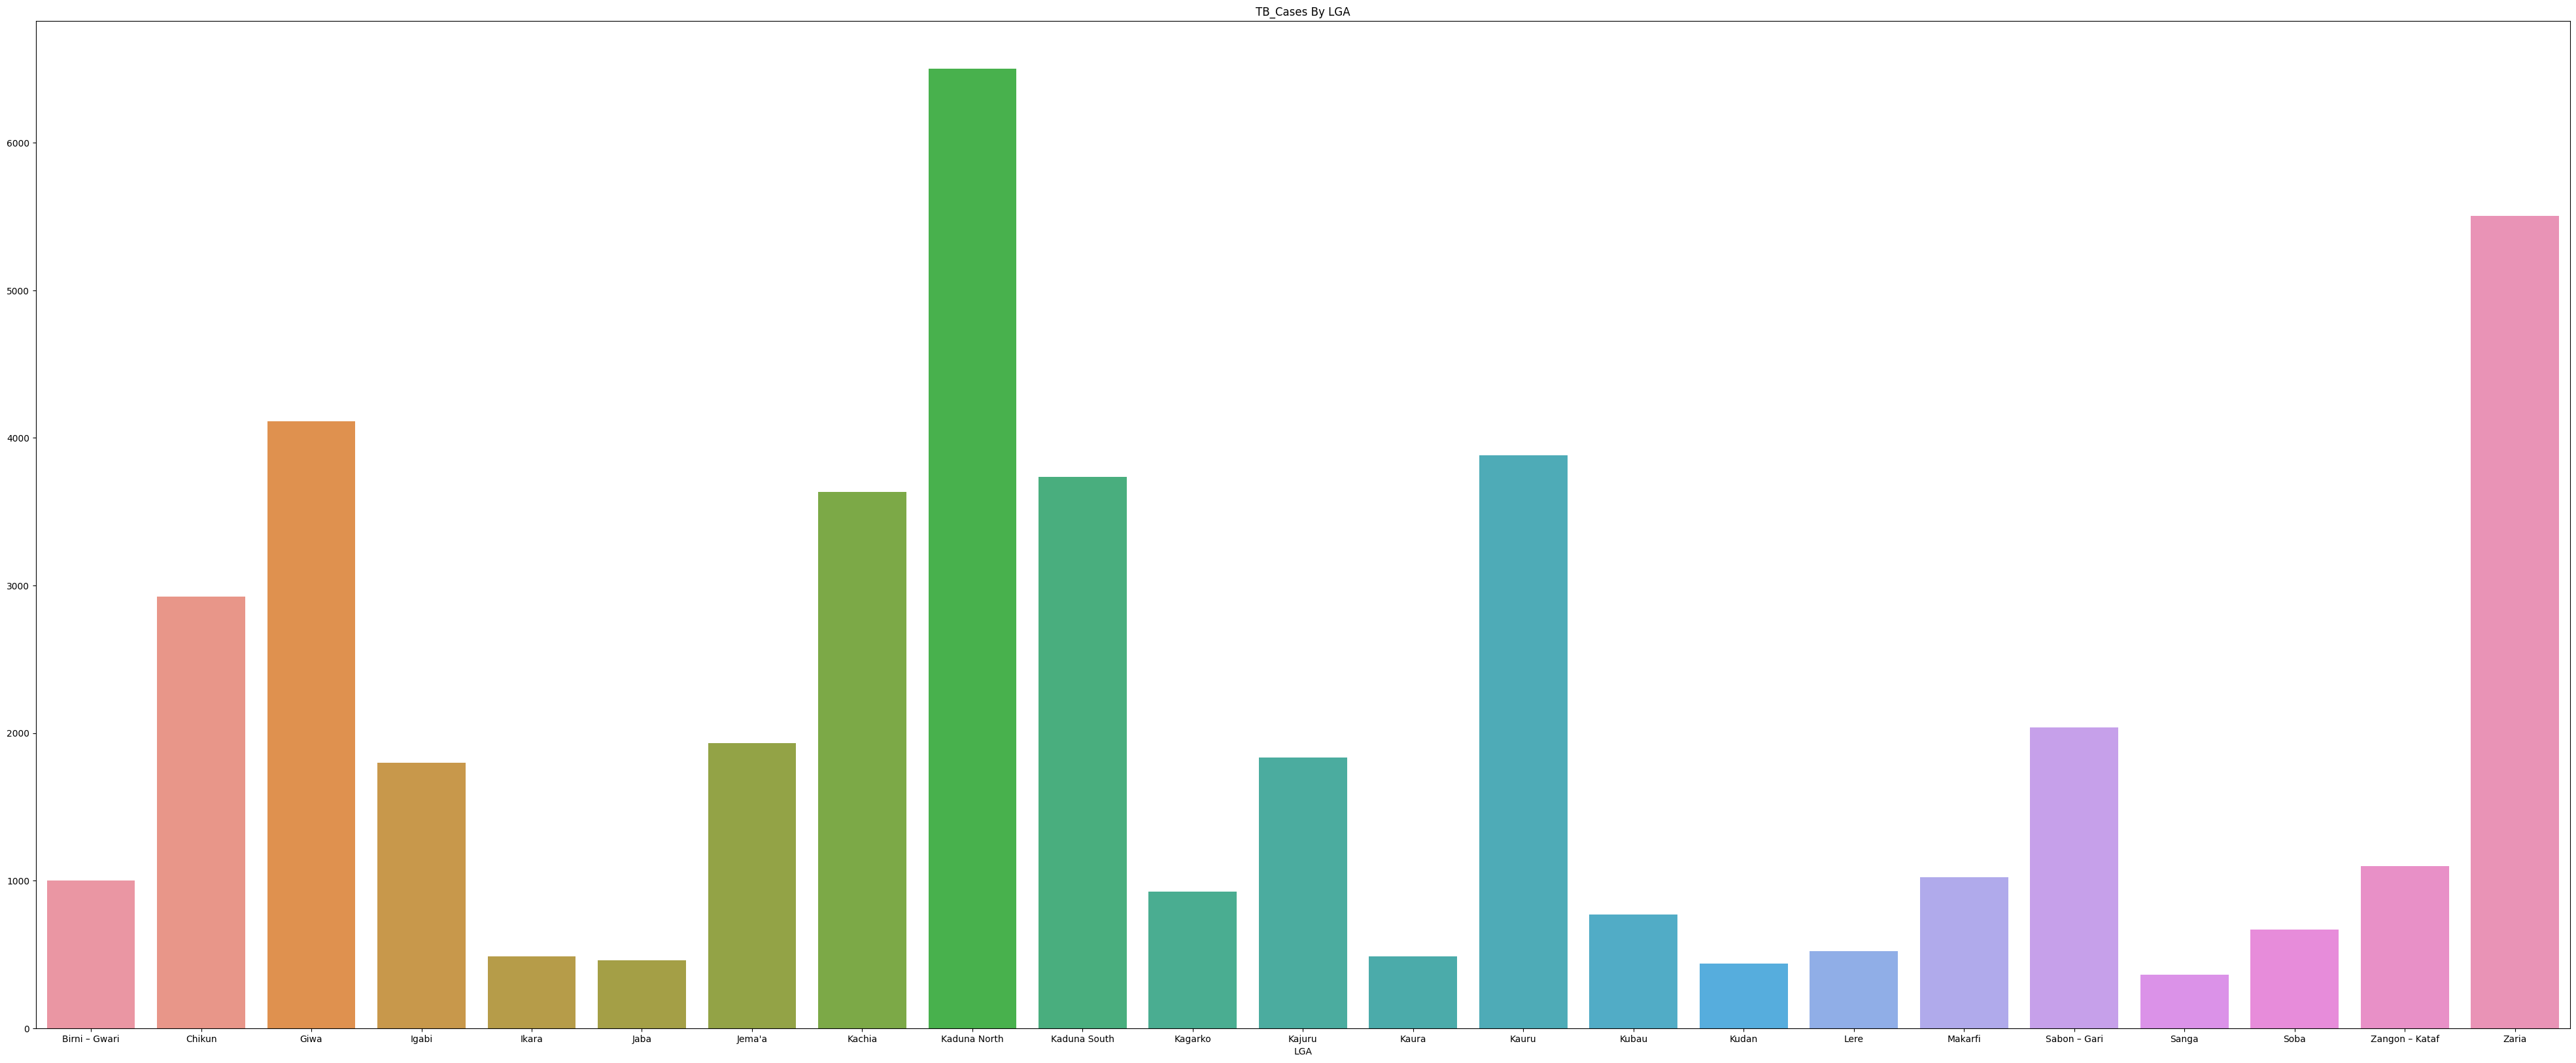

In [67]:
plt.figure(figsize=(50,20))
sns.barplot(
    x = TB_Cases_By_LGA.index,
    y = TB_Cases_By_LGA.values
)
plt.title('TB_Cases By LGA')

### TB_Cases By Gender

In [43]:
TB_Cases_By_Sex = data_group(block2C,'Sex','TB_Cases','sum')

In [44]:
TB_Cases_By_Sex

Sex
Female    18651
Male      27479
Name: TB_Cases, dtype: int64

Text(0.5, 1.0, 'TB_Cases By Gender')

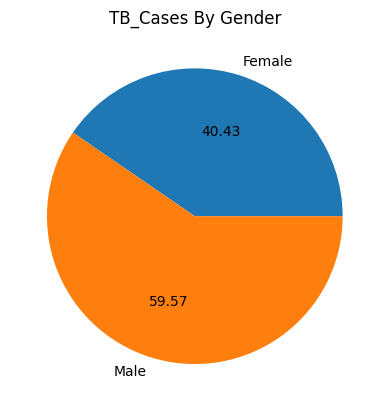

In [68]:
plt.pie(
    x = TB_Cases_By_Sex.values,
    labels = TB_Cases_By_Sex.index,
    autopct = "%.2f"
)
plt.title('TB_Cases By Gender')

### TB_Cases By Age_Gr

In [46]:
TB_Cases_By_AgeGr = data_group(block2C,'Age_Gr','TB_Cases','sum')

In [47]:
TB_Cases_By_AgeGr

Age_Gr
0-4       1072
15-24     7774
25-34    12313
35-44    10350
45-54     6667
5-14      2194
55-64     3667
>=65      2093
Name: TB_Cases, dtype: int64

Text(0.5, 1.0, 'TB_Cases By Age_Gr')

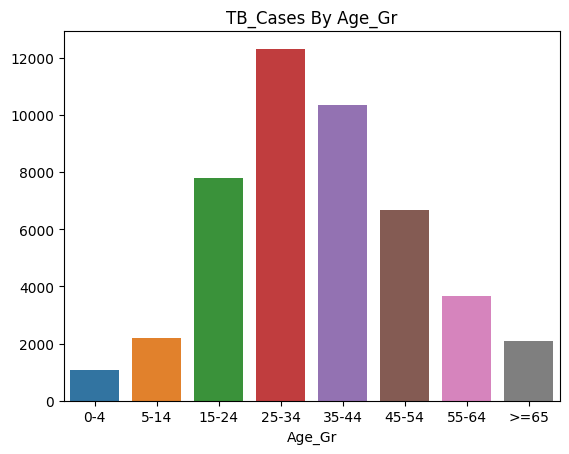

In [69]:
sns.barplot(
    x = TB_Cases_By_AgeGr.index,
    y = TB_Cases_By_AgeGr.values,
    order = ['0-4','5-14','15-24','25-34','35-44','45-54','55-64','>=65']
)
plt.title('TB_Cases By Age_Gr')

## MULTIVARIATE ANALYSIS

### TB Cases trend over years for each LGA

In [49]:
TB_Cases_Over_Years_For_LGA = block2C.groupby(['LGA','Year'])['TB_Cases'].sum().reset_index()

In [50]:
TB_Cases_Over_Years_For_LGA

,LGA,Year,TB_Cases
0,Birni – Gwari,2021,259
1,Birni – Gwari,2022,478
2,Birni – Gwari,2023,264
3,Chikun,2021,694
4,Chikun,2022,1395
...,...,...,...
64,Zangon – Kataf,2022,441
65,Zangon – Kataf,2023,421
66,Zaria,2021,1253
67,Zaria,2022,2680


Text(0.5, 0.98, 'TB Cases trend over years for each LGA')

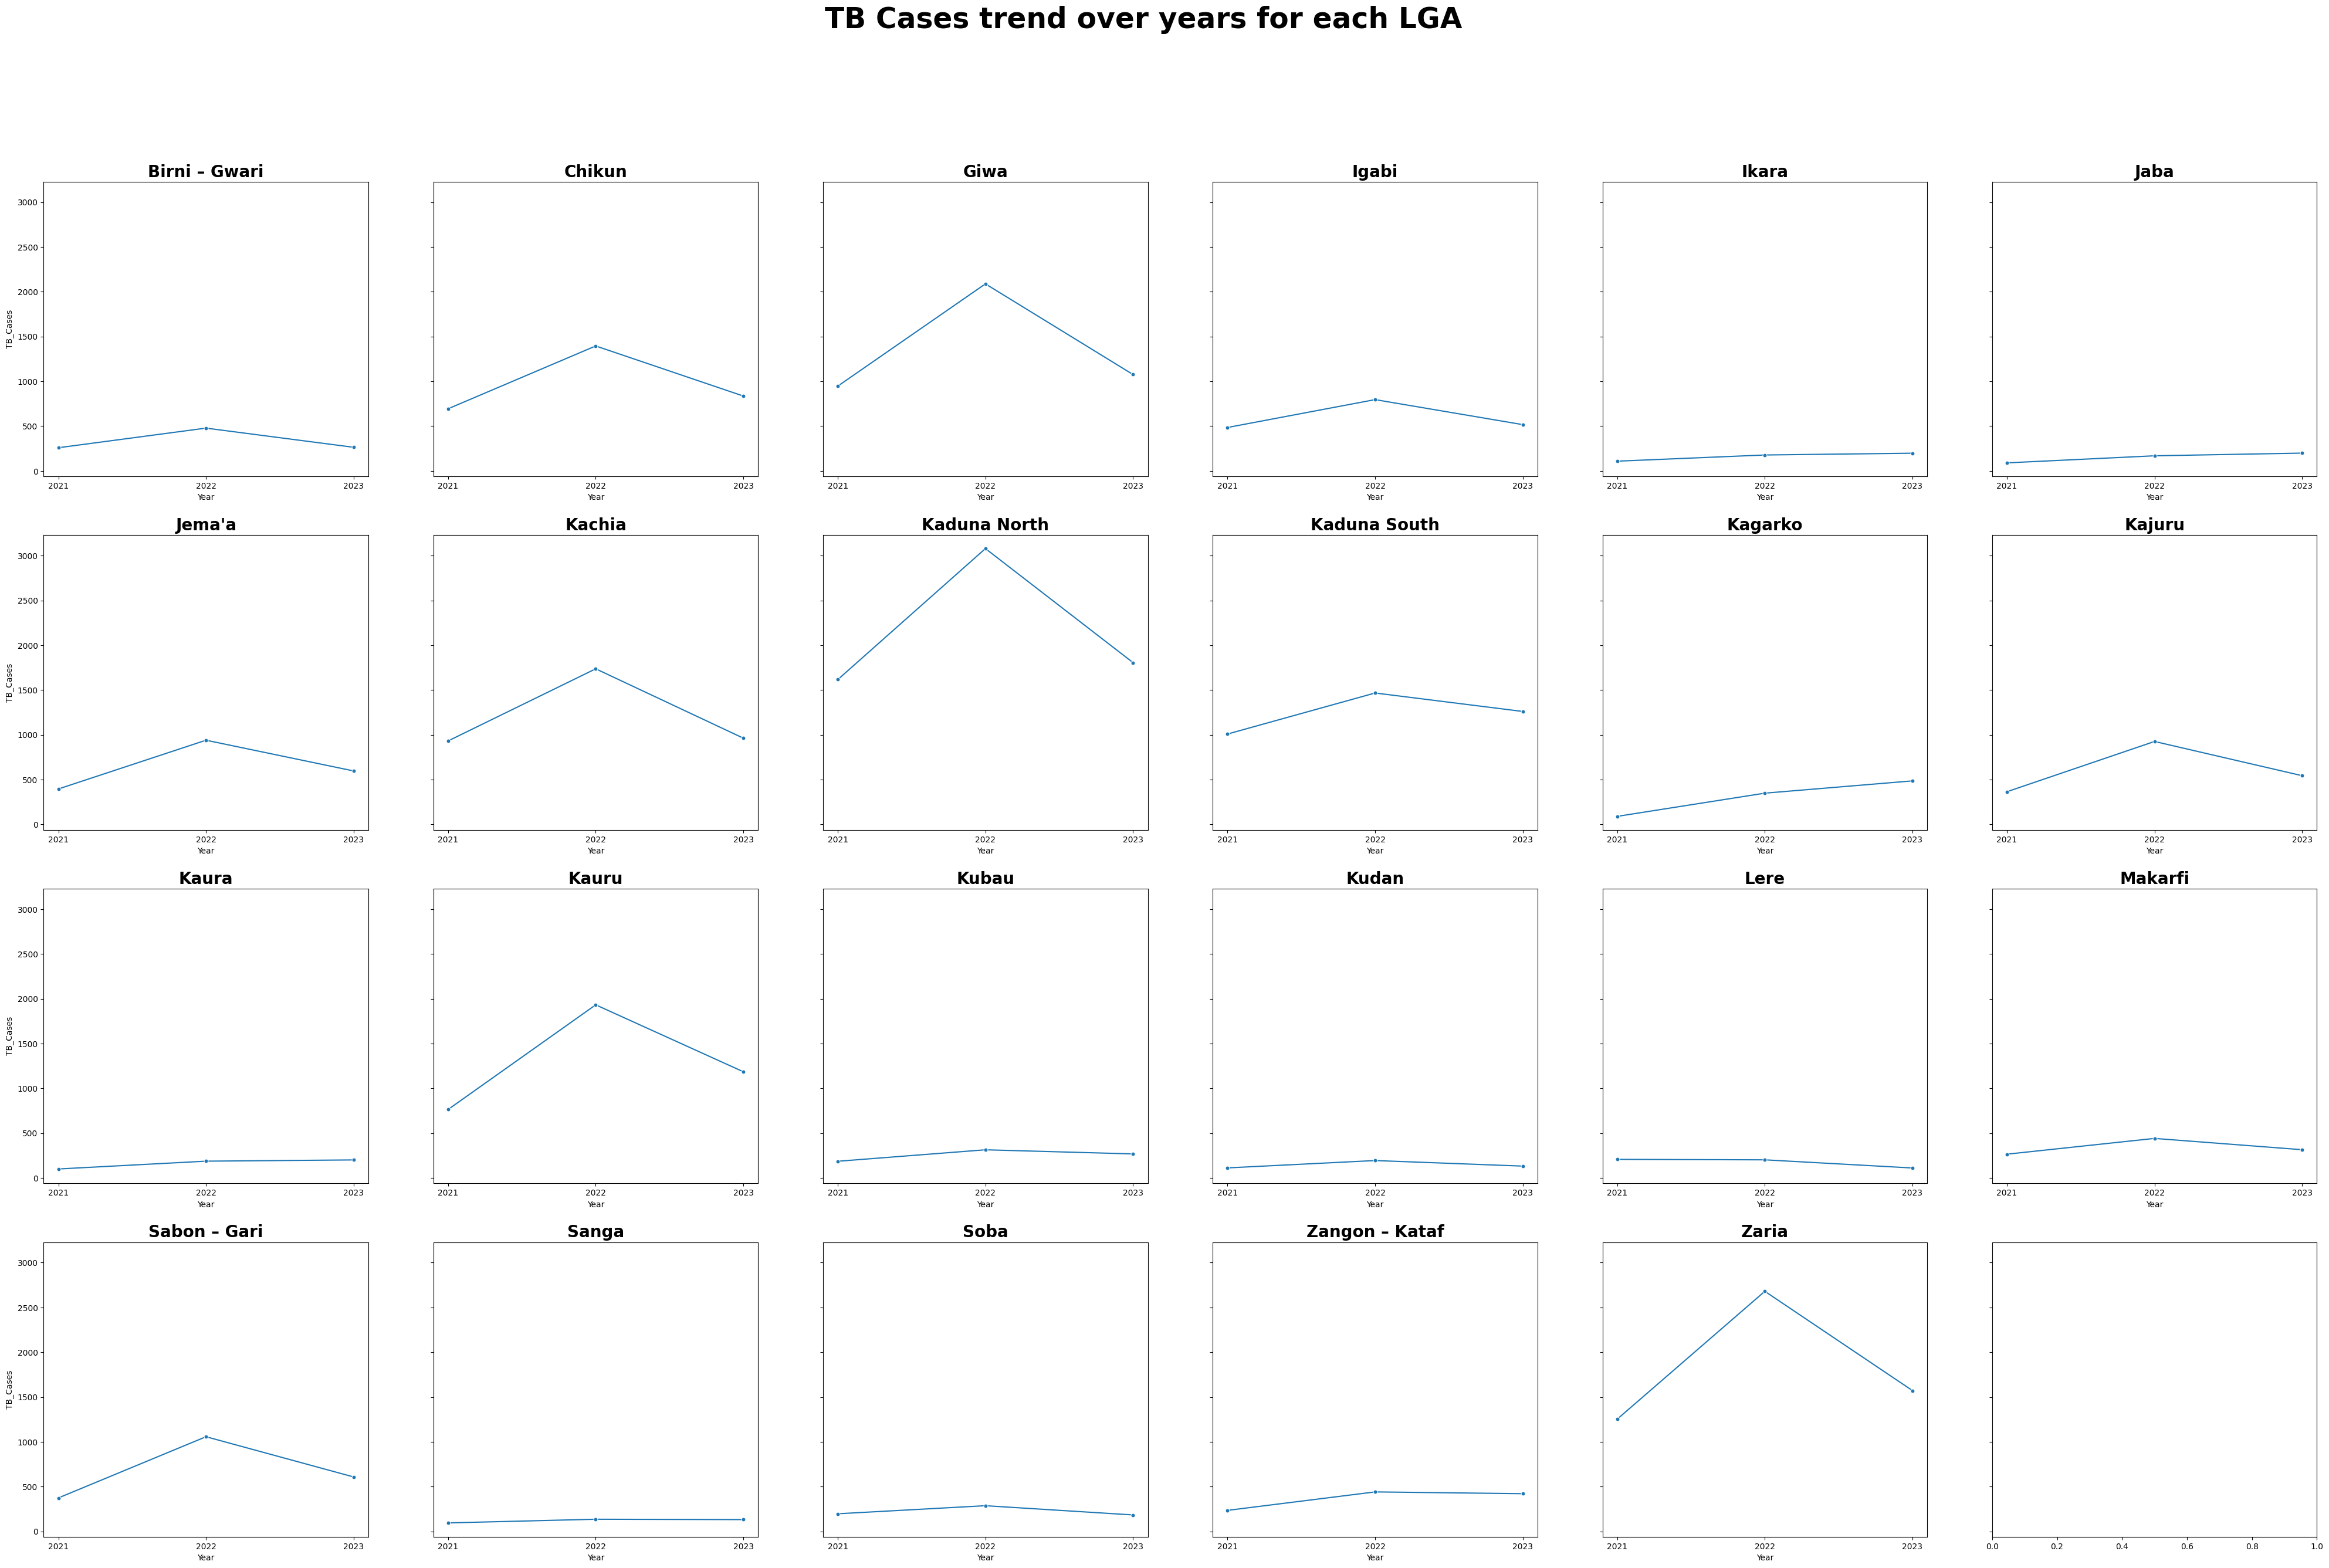

In [70]:
fig,axes = plt.subplots(4,6,sharey=True,figsize=(50,30))

i=0
j=0
for lga in pd.unique(block2C['LGA']):
  sns.lineplot(
      data =  TB_Cases_Over_Years_For_LGA.loc[TB_Cases_Over_Years_For_LGA['LGA']==lga],
      x = 'Year',
      y = 'TB_Cases',
      marker = 'o',
      markersize=5,
      ax = axes[i,j]
  )
  axes[i,j].set_xticks([2021.0,2022.0,2023.0],[2021,2022,2023])
  axes[i,j].set_title(lga,fontsize=20,fontweight='bold')
  j = j+1
  if j ==6:
    i = i+1
    j=0

plt.suptitle('TB Cases trend over years for each LGA',fontsize=35,fontweight='bold')

### TB_Cases_Over_Years_For_AgeGr

In [52]:
TB_Cases_Over_Years_For_AgeGr = block2C.groupby(['Age_Gr','Year'])['TB_Cases'].sum().reset_index()

In [53]:
TB_Cases_Over_Years_For_AgeGr

,Age_Gr,Year,TB_Cases
0,0-4,2021,137
1,0-4,2022,518
2,0-4,2023,417
3,15-24,2021,1935
4,15-24,2022,3451
5,15-24,2023,2388
6,25-34,2021,3043
7,25-34,2022,5892
8,25-34,2023,3378
9,35-44,2021,2432


Text(0.5, 0.98, 'TB Cases trend over years for each Age Gr.')

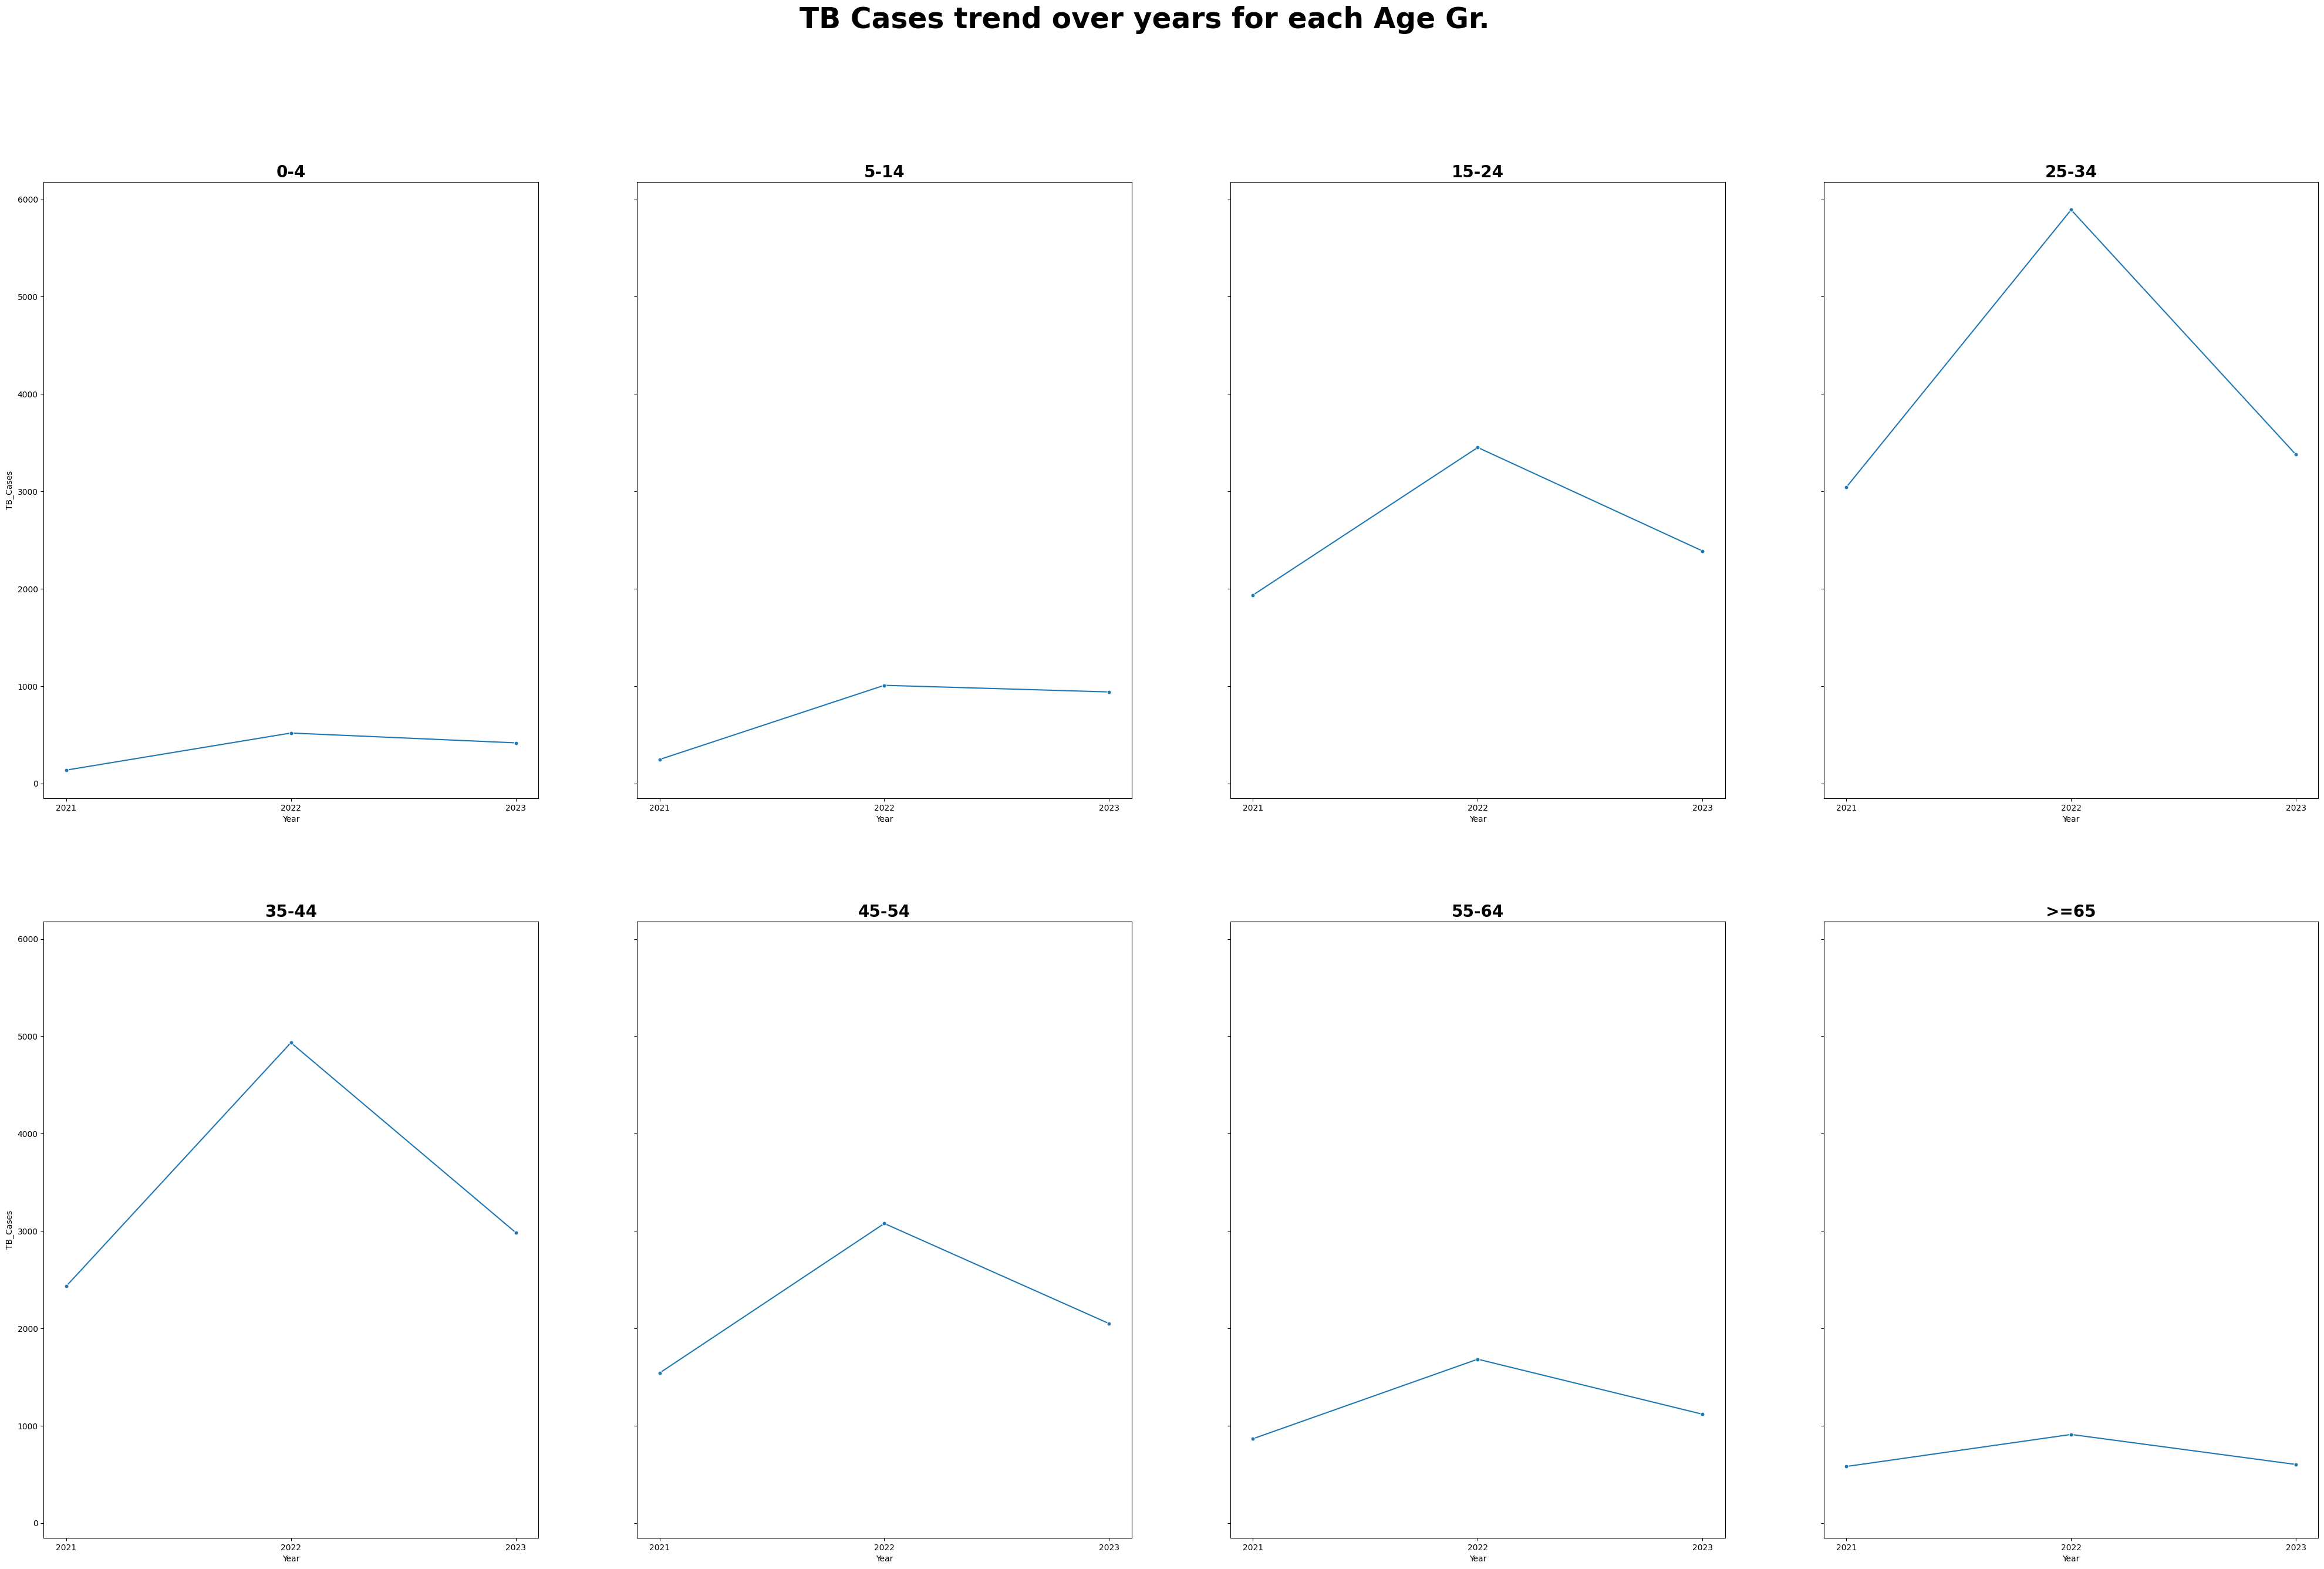

In [71]:
fig,axes = plt.subplots(2,4,sharey=True,figsize=(50,30))

i=0
j=0
for age in pd.unique(block2C['Age_Gr']):
  sns.lineplot(
      data =  TB_Cases_Over_Years_For_AgeGr.loc[TB_Cases_Over_Years_For_AgeGr['Age_Gr']==age],
      x = 'Year',
      y = 'TB_Cases',
      marker = 'o',
      markersize=5,
      ax = axes[i,j]
  )
  axes[i,j].set_xticks([2021.0,2022.0,2023.0],[2021,2022,2023])
  axes[i,j].set_title(age,fontsize=20,fontweight='bold')
  j = j+1
  if j ==4:
    i = i+1
    j=0

plt.suptitle('TB Cases trend over years for each Age Gr.',fontsize=35,fontweight='bold')

In [57]:
TB_Cases_Over_Years_For_Gender = block2C.groupby(['Sex','Year'])['TB_Cases'].sum().reset_index()

In [58]:
TB_Cases_Over_Years_For_Gender

,Sex,Year,TB_Cases
0,Female,2021,4241
1,Female,2022,8829
2,Female,2023,5581
3,Male,2021,6540
4,Male,2022,12644
5,Male,2023,8295


Text(0.5, 0.98, 'TB_Cases Over Years For Gender')

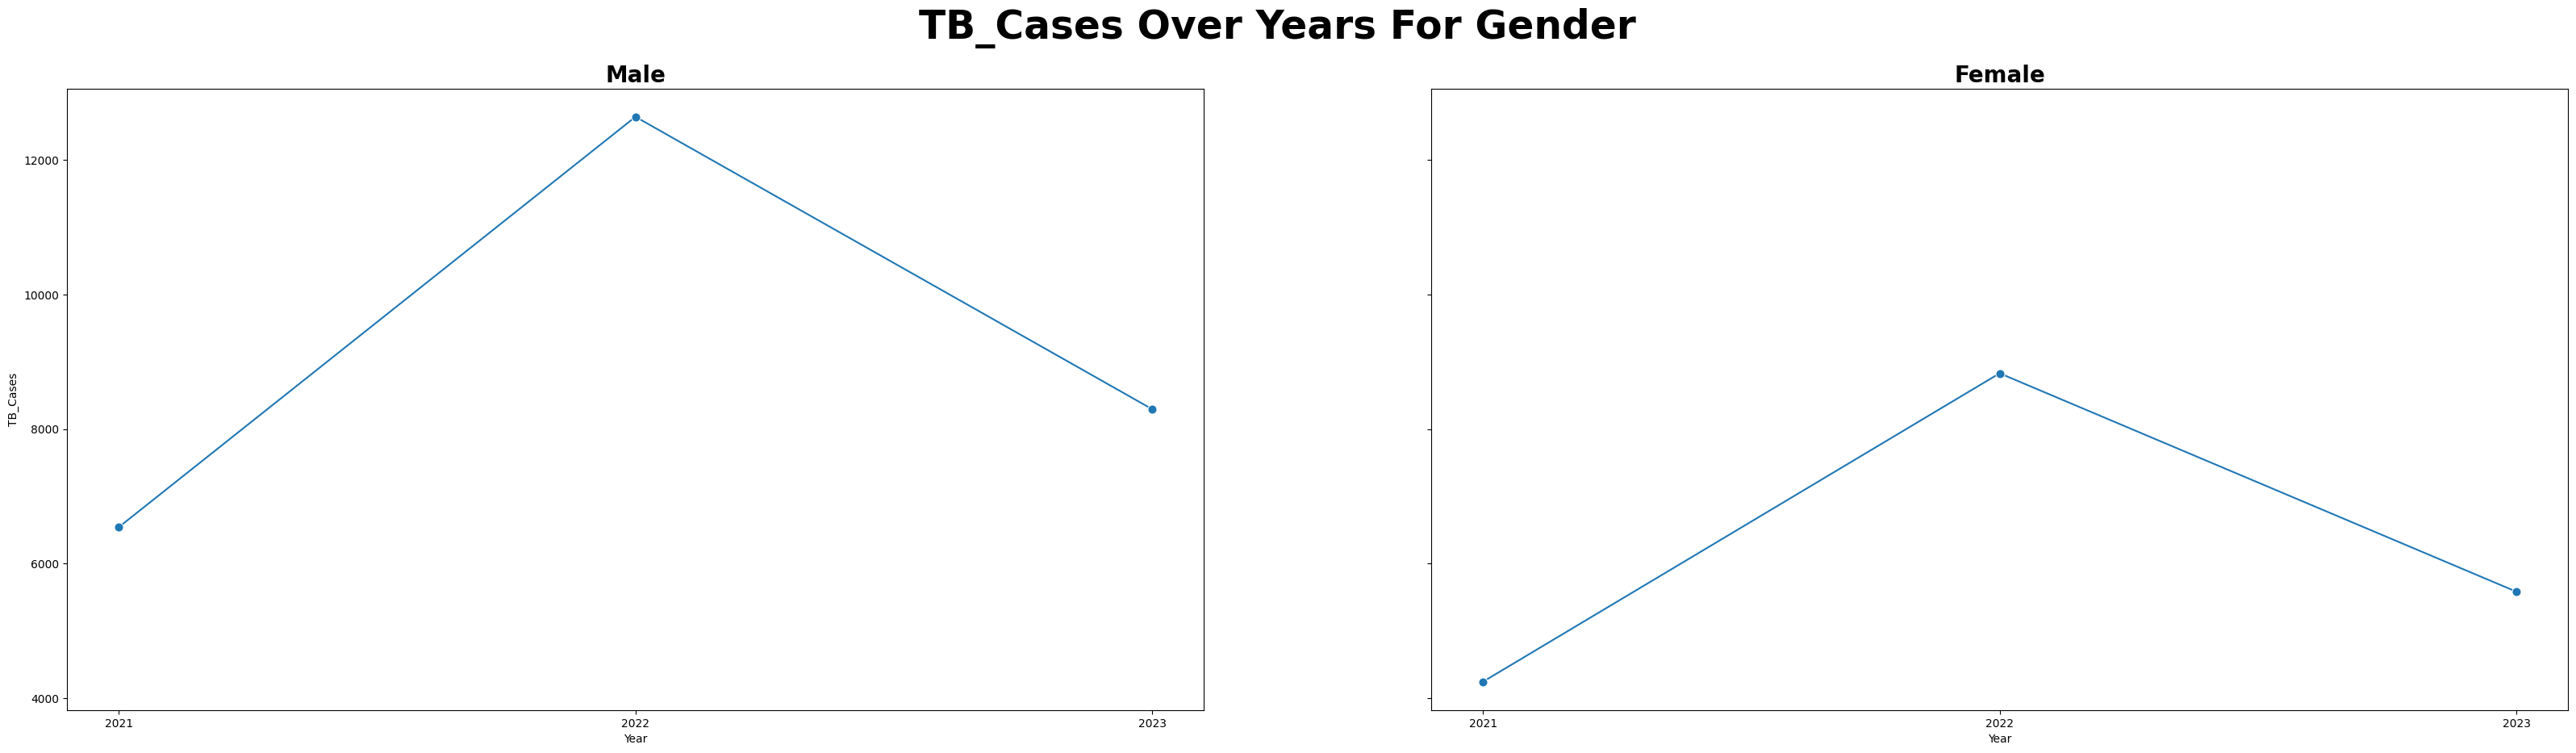

In [72]:
fig,axes = plt.subplots(1,2,sharey=True,figsize=(40,10))

sns.lineplot(
    data = TB_Cases_Over_Years_For_Gender.loc[TB_Cases_Over_Years_For_Gender['Sex'] == 'Male'],
    x = 'Year',
    y = 'TB_Cases',
    marker='o',
    markersize=8,
    ax=axes[0]
)
axes[0].set_xticks([2021.0,2022.0,2023.0],[2021,2022,2023])
axes[0].set_title('Male',fontsize=20,fontweight='bold')

sns.lineplot(
    data = TB_Cases_Over_Years_For_Gender.loc[TB_Cases_Over_Years_For_Gender['Sex'] == 'Female'],
    x = 'Year',
    y = 'TB_Cases',
    marker='o',
    markersize=8,
    ax=axes[1]
)
axes[1].set_xticks([2021.0,2022.0,2023.0],[2021,2022,2023])
axes[1].set_title('Female',fontsize=20,fontweight='bold')

plt.suptitle('TB_Cases Over Years For Gender',fontsize=35,fontweight='bold')

## DATA

In [74]:
block2C.to_csv('Block2C.csv')